## IMPORT DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_main = pd.read_csv("../input/digit-recognizer/train.csv")
df_competetion = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
train = df_main.iloc[:,0].to_frame()

In [4]:
train['pixels'] = list(df_main.iloc[:,1:].values)

In [5]:
import matplotlib.pyplot as plt

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   42000 non-null  int64 
 1   pixels  42000 non-null  object
dtypes: int64(1), object(1)
memory usage: 656.4+ KB


### Image Visualization

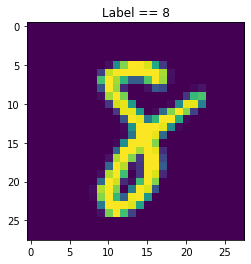

In [7]:
row = 300
plt.title(f"Label == {train.loc[row,'label']}")
plt.imshow(train.loc[row,'pixels'].reshape(28,28,1))

## Data Preprocessing

In [8]:
# Normalize the Data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [9]:
df_main_scaled = pd.DataFrame(std_scaler.fit_transform(df_main.iloc[:,1:].values), columns = [f"pixel_{i}" for i in range(df_main.shape[1] - 1)])
df_main_scaled['Label'] = df_main.iloc[:,0]

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca.fit(df_main_scaled.drop(columns = ['Label']))
df_main_pca = pca.transform(df_main_scaled.drop(columns = ['Label']))

In [11]:
df_main_pca = pd.DataFrame(df_main_pca, columns = [f'PCA_COMP_{i}' for i in range(df_main_pca.shape[1])])
df_main_pca['Label'] = df_main_scaled['Label']

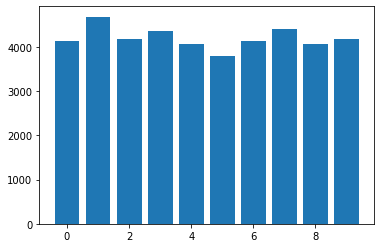

In [12]:
df_to_plot = df_main_pca.Label.value_counts(dropna=False).sort_index().rename('Label_Count').reset_index()
plt.bar(df_to_plot.index, df_to_plot.Label_Count)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_main_pca.loc[:,df_main_pca.columns != 'Label']
y = df_main_pca.loc[:,'Label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30, shuffle = True)

## Model Fitting

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean',)

In [18]:
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [19]:
y_pred_test = knn_classifier.predict(X_test)

In [20]:
y_pred_train = knn_classifier.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [22]:
print(f"'for train :: f1_score = {f1_score(y_train, y_pred_train, average = 'weighted')}")
print(f"'for train :: f1_score = {accuracy_score(y_train, y_pred_train)}")

'for train :: f1_score = 0.963032359011403
'for train :: f1_score = 0.9630952380952381


In [23]:
print(f"'for test :: f1_score = {f1_score(y_test, y_pred_test, average = 'weighted')}")
print(f"'for test :: f1_score = {accuracy_score(y_test, y_pred_test)}")

'for test :: f1_score = 0.9503220279596747
'for test :: f1_score = 0.9504761904761905


## TSNE Plots for Checking the Spread and Separation 

In [24]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(df_main_pca.loc[:,df_main_pca.columns != 'Label'])

fig = px.scatter(
    projections, x=0, y=1,
    color = df_main_pca['Label'], labels={'color': 'Label'}
)
fig.show()

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [25]:
# tsne_3d = TSNE(n_components=3, random_state=0)
# projections = tsne_3d.fit_transform(df_main_pca.loc[:,df_main_pca.columns != 'Label'])

# fig = px.scatter_3d(
#     projections, x=0, y=1, z=2,
#     color = df_main_pca['Label'], labels={'color': 'Label'}
# )
# fig.update_traces(marker_size=8)
# fig.show()

## Prediction and Submission

In [26]:
df_competetion.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_competetion_scaled = pd.DataFrame(std_scaler.transform(df_competetion.iloc[:,0:].values), columns = [f"pixel_{i}" for i in range(df_competetion.shape[1])])

In [28]:
df_competetion_pca = pca.transform(df_competetion_scaled)

In [29]:
df_competetion_pca = pd.DataFrame(df_competetion_pca, columns = [f'PCA_COMP_{i}' for i in range(df_competetion_pca.shape[1])])
df_competetion_pca['Label'] = knn_classifier.predict(df_competetion_pca)

In [30]:
df_submission = df_competetion_pca['Label'].rename_axis(index='ImageId').reset_index()

In [31]:
df_submission['ImageId'] = df_submission['ImageId'] + 1

In [32]:
df_submission.to_csv('./submission.csv', index = False)